# Unsupervised classification of wine

This is an unsupervised analysis exercise on the "Wine" dataset from SKlearn [1,2]. The data is the results of a chemical analysis of 178 wines grown in the same region in Italy by three different cultivators. There are 13 different measurements taken for different constituents found in the wine, listed below.

### Features:
The data features / input variables (X) are:
* alcohol
* malic_acid
* ash
* alcalinity_of_ash
* magnesium
* total_phenols
* flavanoids
* nonflavanoid_phenols
* proanthocyanins
* color_intensity
* hue
* od280/od315_of_diluted_wines
* proline

Note, that there is a target value (target = cultivator [0, 1, 2]) in the data, but that this is only for checking how well your dimensionality reduction / clustering works.


### Task:
Thus, the task before you is to:<br>
1) Make three queries, which produces three files of data containing stars, galaxies, and quasars.<br>
2) Combine the three data files into one, which has a target value corresponding to the file type.<br>
3) Read and inspect this data, and make sure that you understand what it (roughly) looks like.<br>
4) Clean/cut (or impute) the data, such that different (unsupervised) analysis techniques will work.<br>
5) Run a (k)PCA (and later other techniques) on it, and see what the resulting distributions looks like.<br>

Do you in the end manage to get e.g. get three well separated classes out?<br>

***

[1] Original Owners: Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

[2] Citation: Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

***

* Author: Troels C. Petersen (NBI)
* Email:  petersen@nbi.dk
* Date:   27th of April 2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

In [4]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# Search for missing, NA and null values)


(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
data.target=data.target.astype('int64').astype('category')

#Frequency.
freq=data['target'].value_counts()

freq

1    71
0    59
2    48
Name: target, dtype: int64

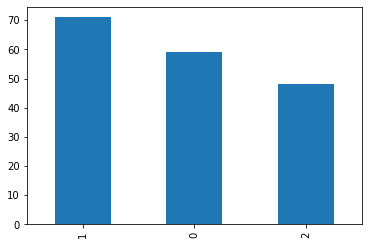

In [8]:
#Let's check graphically.
freq.plot(kind='bar')

In [9]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1ba83fc10>,
      dtype=object)

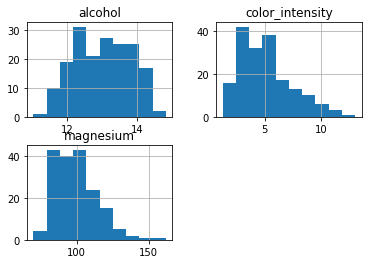

In [10]:
#Let's show the histograms of the variables alcohol, magnesium y color_intensity.
#Histogramas
data[['alcohol','magnesium','color_intensity']].hist()

### Notes on observations so far:
In the previous points we see how all the variables in the dataset, except the target variable, are continuous numerical. There are no missing values in any of the variables. From the basic statistical values we can see that none of the variables follows a normal distribution, since none has mean 0 and standard deviation 1. In the histograms we can observe how the alcohol variable has a more or less centered distribution, with most of the records having values between 12 and 14 degrees, as for color_intensity and magnesium, we observe that their distributions are skewed to the left.

In [ ]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

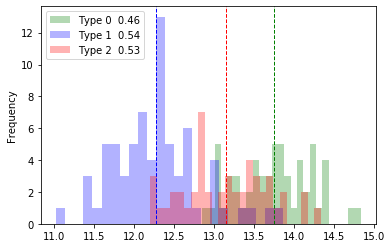

In [11]:
#Alcohol histograms with the mean and the standard deviation.
x1 = data.loc[data.target==0, 'alcohol']
x2 = data.loc[data.target==1, 'alcohol']
x3 = data.loc[data.target==2, 'alcohol']

kwargs = dict(alpha=0.3,bins=25)
plt.hist(x1, **kwargs, color='g', label='Type 0'+  str("{:6.2f}".format(x1.std())))
plt.hist(x2, **kwargs, color='b', label='Type 1'+  str("{:6.2f}".format(x2.std())))
plt.hist(x3, **kwargs, color='r', label='Type 2'+  str("{:6.2f}".format(x3.std())))
plt.gca().set(title='', ylabel='Frequency')
plt.axvline(x1.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x2.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend();

In [12]:
#Correlation table
df=data[['alcohol','magnesium','color_intensity']]
df.corr()

,alcohol,magnesium,color_intensity
alcohol,1.000000,0.270798,0.546364
magnesium,0.270798,1.000000,0.199950
color_intensity,0.546364,0.199950,1.000000


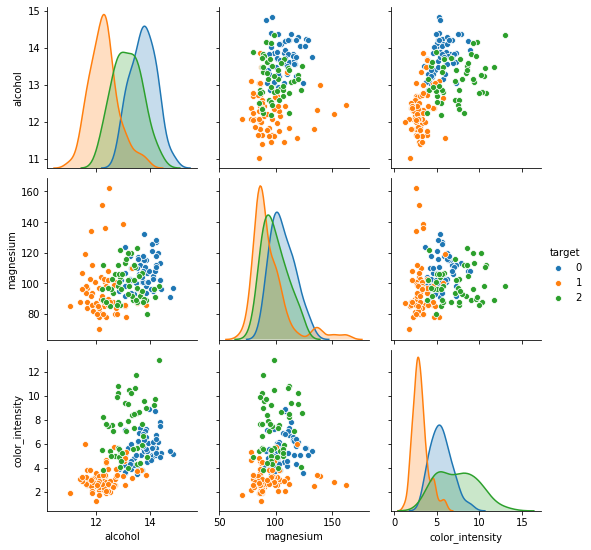

In [13]:
#scatter plots
df=data[['alcohol','magnesium','color_intensity','target']]
sns.pairplot(df,hue='target')

In [14]:
#Import standardscaler
from sklearn.preprocessing import StandardScaler

#Remove target columns.
x = data.loc[:,data.columns != 'target'].values
y = data.loc[:,['target']].values

#Scale the data
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)
# Create PCA object.
pca = PCA(n_components=2)

#Run PCA.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [15]:
# Join again the target variable

finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()

,PC 1,PC 2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


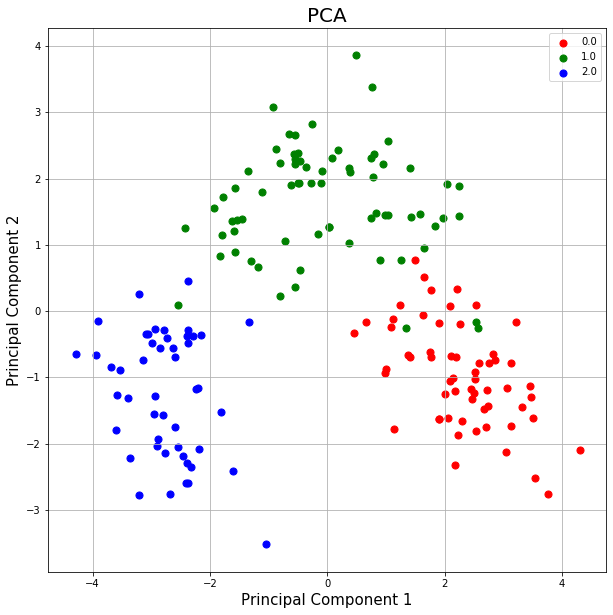

In [16]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
#Use same variables as in the previous point, they are already standarized
# Create TSNE object.
X_embedded = TSNE(n_components=2,perplexity=15,random_state=42).fit_transform(x)

tsneDf = pd.DataFrame(data = X_embedded
             , columns = ['PC 1', 'PC 2'])

tsneDf.head()

,PC 1,PC 2
0,24.224854,7.266065
1,15.240703,8.397134
2,18.322884,17.680305
3,25.254492,17.822229
4,15.645270,22.721230


In [18]:
# Join the target variable

ftnseDf = pd.concat([tsneDf, data[['target']]], axis = 1)
ftnseDf.head()


,PC 1,PC 2,target
0,24.224854,7.266065,0
1,15.240703,8.397134,0
2,18.322884,17.680305,0
3,25.254492,17.822229,0
4,15.645270,22.721230,0


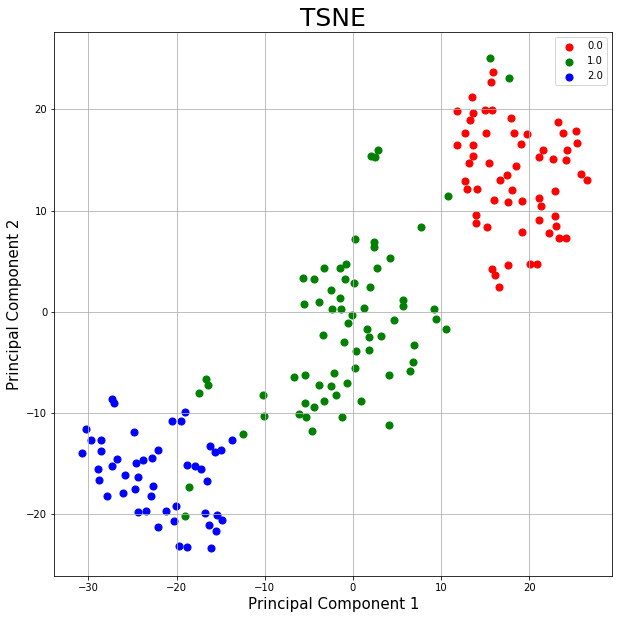

In [19]:
# Show the graphic.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE', fontsize = 25)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = ftnseDf['target'] == target
    ax.scatter(ftnseDf.loc[indicesToKeep, 'PC 1']
               , ftnseDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()